# How to access, read and plot ET MDC1 data

**Modified from https://gitlab.et-gw.eu/osb/div10/mdc-tutorial**

In [1]:
# Importing the sys module to manipulate the Python runtime environment
import sys

# Adding a specific path to the beginning of the sys.path list
# This path points to a directory containing Python packages
# This is typically done to ensure that the desired version of a package is used
# In this case, the path points to the site-packages directory of the igwn-py39 environment
sys.path = ['/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages'] + sys.path


In [2]:
# Importing the pyplot module from the matplotlib library and aliasing it as plt
from matplotlib import pyplot as plt

# Importing the gwpy library, which provides tools for gravitational wave data analysis
import gwpy

# Importing the TimeSeries class from the gwpy.timeseries module
from gwpy.timeseries import TimeSeries

# Importing the NumPy library and aliasing it as np
import numpy as np

# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Importing the seaborn library for statistical data visualization
import seaborn as sns


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Setting the path to the directory containing the Einstein Telescope Mock Data Challenge 1 (MDC1) data
MDC_PATH = "/cvmfs/et-gw.osgstorage.org/et-gw/PUBLIC/MDC1/data"

# Defining a list of datasets, each identified by a string (E0, E1, ..., C2)
DATASETS = ['E0','E1','E2','E3','C1','C2']

# Creating a dictionary to map each dataset to its corresponding channel
# Each channel is specified as a string with the dataset name followed by ":STRAIN"
CHANNELS = {n : f'{n}:STRAIN' for n in DATASETS}

In [4]:
# Reading a gravitational wave strain time series from a GWF file using the gwpy library
# The file path is constructed based on the MDC_PATH and dataset ('E1') information
e0 = TimeSeries.read(MDC_PATH+'/E1/E-E1_STRAIN_DATA-1000000000-2048.gwf', 'E1:STRAIN')

# Printing the first 10 elements of the TimeSeries object (time series data)
# The TimeSeries object contains various metadata and information about the strain data
print(e0[1:10])


TimeSeries([-5.54284896e-23,  8.72894580e-23, -1.52215950e-22,
             1.93370972e-22, -1.56591158e-22,  2.12791581e-22,
            -7.75441870e-23, -5.23293157e-23, -7.15922186e-23]
           unit: strain,
           t0: 1000000000.0001221 s,
           dt: 0.0001220703125 s,
           name: E1:STRAIN,
           channel: E1:STRAIN)


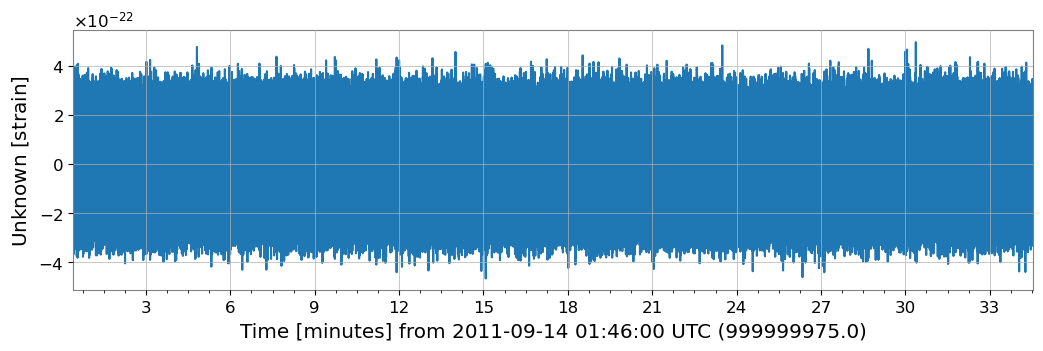

In [5]:
# Enabling inline plotting in Jupyter notebooks or IPython environments
%matplotlib inline

# Creating a plot of the gravitational wave strain data using the plot() method of the TimeSeries object
plot = e0.plot()


### How to plot only the signal on a given time window

In [6]:
# Importing the lal module, which is part of the LIGO Scientific Collaboration (LSC) software stack
import lal

def read_without_warnings(cachefile, channel, **kwargs):
    """
    Reads cache file while suppressing spurious LAL warnings.
    Wraps gwpy.timeseries.TimeSeries.read

    Args:
        cachefile (str): path to cache file
        channel (str): Channel name
        **kwargs: additional arguments passed to TimeSeries.read
    """
    # Storing the previous debug level to later restore it
    prev_level = lal.GetDebugLevel()

    # Temporarily setting the LAL debug level to 0 (suppressing warnings)
    lal.ClobberDebugLevel(0)

    # Reading the cache file using gwpy.timeseries.TimeSeries.read
    result = TimeSeries.read(cachefile, channel, **kwargs)

    # Restoring the original LAL debug level
    lal.ClobberDebugLevel(prev_level)

    # Returning the result (TimeSeries object)
    return result

def get_strain(file, channel, tc, t_before=4, t_after=1):
    """
    Reads a portion of strain data from a cache file centered around a specified time.
    
    Args:
        file (str): Path to the cache file
        channel (str): Channel name
        tc (float): Time center around which to read strain data
        t_before (float): Time before the center time to include in the data
        t_after (float): Time after the center time to include in the data

    Returns:
        TimeSeries: Portion of the strain data centered around the specified time
    """
    # Calculating the start and end times based on the specified time center and time intervals
    start_time = tc - t_before
    end_time = tc + t_after

    # Reading the strain data from the cache file without generating LAL warnings
    h = read_without_warnings(file, channel, start=start_time, end=end_time)

    # Returning the TimeSeries object containing the strain data
    return h


In [7]:
# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Reading a CSV file containing metadata about signals
# The file is assumed to be located one level up in the directory structure
signals = pd.read_csv('../metadata/list_etmdc1_snr.txt', sep=' ')

# Choosing the top few signals (Nsig = 4)
Nsig = 4
top_sigs = signals.iloc[:Nsig]

# Iterating over the top signals and printing relevant information
for idx, pars in top_sigs.iterrows():
    # Printing information about each signal
    print(f'Inj {int(pars["#"])}, tc {pars["tc"]}, SNR {pars["SNR"]}')


Inj 42581, tc 1001620463.11925, SNR 587.553918
Inj 42634, tc 1001622678.23317, SNR 386.213044
Inj 35118, tc 1001338345.05655, SNR 383.954083
Inj 41037, tc 1001560353.66079, SNR 374.579215


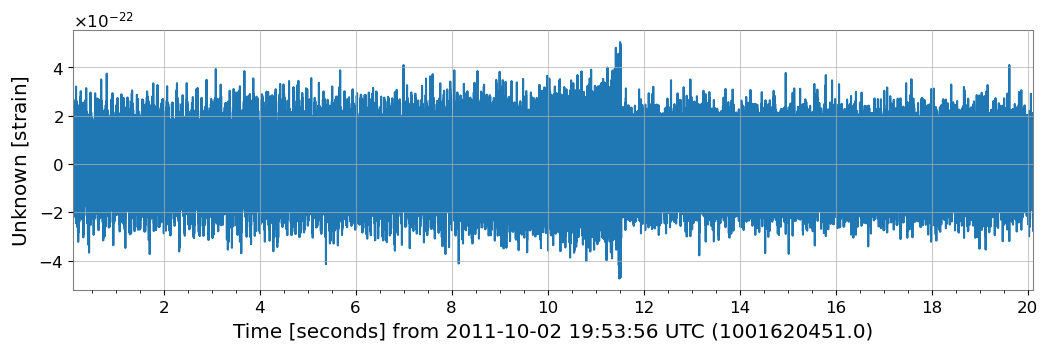

In [18]:
# Specifying the path to the cache file
file = '../caches/E1.lcf'

# Specifying the channel name
channel = 'E1:STRAIN'

# Specifying the time center for reading strain data
tc = 1001620463.11925

# Reading a portion of strain data from the cache file centered around the specified time
# The data includes a time window of 12 seconds before and 8 seconds after the center time
h = get_strain(file, channel, tc, t_before=12, t_after=8)

# Plotting the strain data
h.plot()

# Displaying the plot
plt.show()
